# Text Document Clustering

## Definition of the Problem

In order to understand the practical application of Text Document Clustering we must first understand the problem we are trying to solve

The problem in question would be the existance of large bodies of text, that we would like to segment and categorize according to similaraties in context and subject matter.

Considering the fact that most of the data, text included, that has ever been generated by humanity has been generated in the last 30 years, and most of it is 
unlabled and uncathegorized this is a very much present problem and increasing with the pasage of time 

The purpose of this article is to show the effectivenes of machine learnig in obtaining a usefull categorization of text so that finding the subject of interest is easier and faster than it would be lacking a clear categorization.

For that purpose we shall be using several data sources:
- NPR News Articles https://www.kaggle.com/datasets/gauravduttakiit/npr-data
- Spotify Million Song Dataset https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
- Women's Clothing Review https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
- Bishop Dataset https://www.kaggle.com/datasets/daishinkan002/bishop-topic-modelling-dataset
- State of the Union Corpus https://www.kaggle.com/datasets/rtatman/state-of-the-union-corpus-1989-2017

As it can be noticed these data source are varied in data and subject matter. We intend to see if we can find a good category for the text data present in these data sources.

## Libraries and Imports

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# NPR

In [342]:
data = pd.read_csv('npr.csv')
data.head()

Article
0  In the Washington of 2016, even when the polic...
1    Donald Trump has used Twitter  —   his prefe...
2    Donald Trump is unabashedly praising Russian...
3  Updated at 2:50 p. m. ET, Russian President Vl...
4  From photography, illustration and video, to d...

In [343]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data['Article'])

Of course there is no topic to the artical or category for that matter thus we would need to set it ourselves 

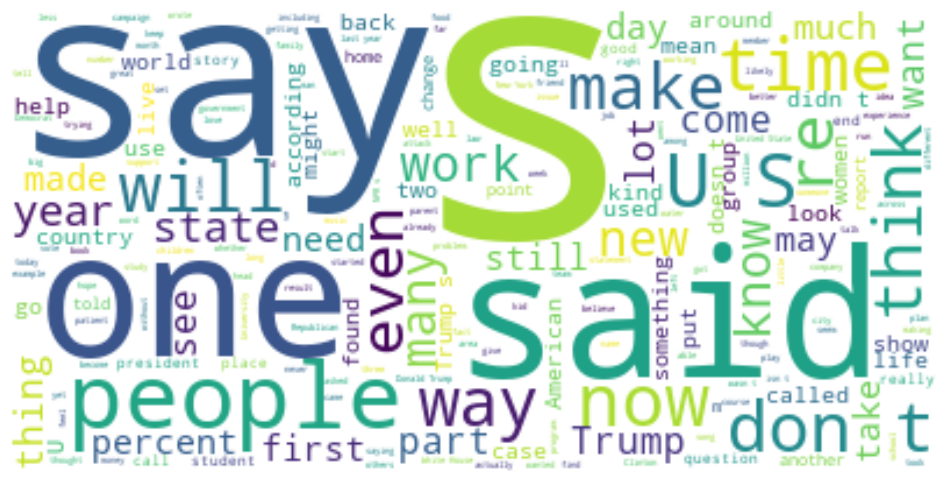

In [344]:
# Get all the text
text =  data.Article.to_list()
text = ' '.join(text)
wordcloud = WordCloud(background_color='white').generate(text)

# Plot Word Cloud
plt.figure(figsize=(12,8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Preprocessing

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

## Fitting the Data

### LDA

In [345]:
LDA = LatentDirichletAllocation(n_components=7
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=20).fit(dtm)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


In [346]:
print(len(cv.get_feature_names_out()), LDA.components_[0].shape)
keys = cv.get_feature_names_out()

54777 (54777,)


In [350]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

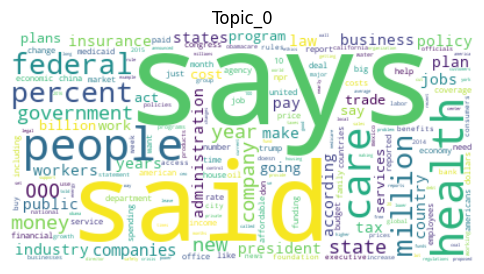

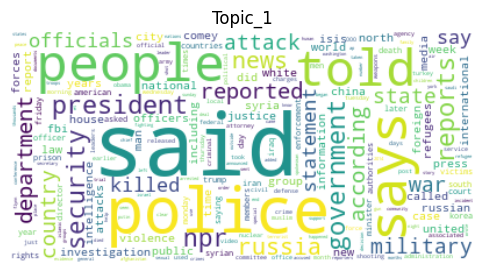

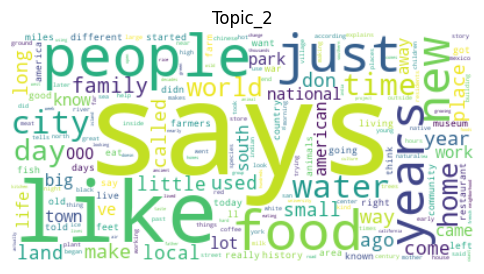

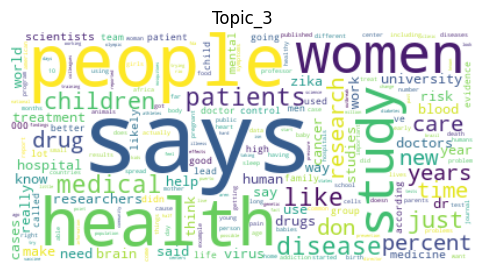

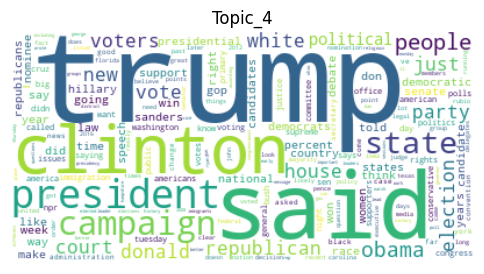

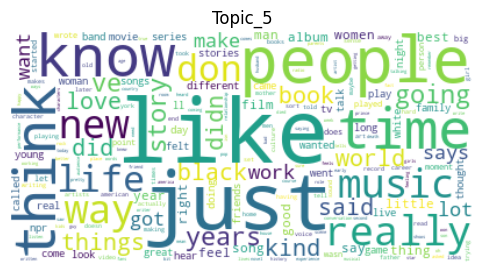

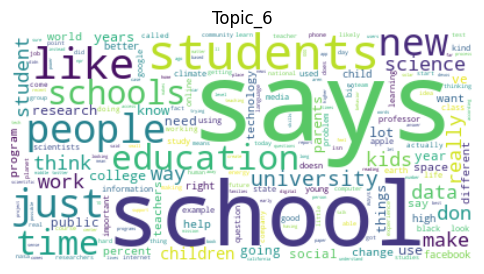

In [351]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f"Topic_{n}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

In [352]:
n = 0
for topic in LDA.components_:
    print(n)
    print(keys[topic.argsort()][-30:])
    print('\n')
    n+=1

0
['industry' 'workers' 'according' 'jobs' 'administration' 'years'
 'president' 'business' 'plan' 'states' 'pay' 'law' 'tax' 'insurance'
 'companies' 'state' '000' 'company' 'money' 'year' 'new' 'government'
 'million' 'federal' 'percent' 'care' 'health' 'people' 'said' 'says']


1
['new' 'time' 'fbi' 'press' 'russian' 'investigation' 'statement' 'say'
 'killed' 'officials' 'state' 'attack' 'country' 'war' 'military'
 'department' 'according' 'reported' 'news' 'russia' 'security' 'npr'
 'reports' 'government' 'president' 'told' 'people' 'says' 'police' 'said']


2
['town' 'national' 'ago' 'called' 'place' 'come' 'used' 'long' 'land'
 'local' 'don' 'little' 'small' 'way' 'year' 'make' 'family' 'world'
 'home' 'day' 'time' 'city' 'water' 'new' 'years' 'just' 'food' 'people'
 'like' 'says']


3
['risk' 'said' 'use' 'zika' 'researchers' 'treatment' 'help' 'hospital'
 'doctors' 'brain' 'university' 'time' 'research' 'years' 'drug' 'new'
 'don' 'percent' 'care' 'just' 'children' 'medical' '

In [353]:
topics = {0: 'Finance'
          , 1: 'International News'
          , 2: 'Local or National News'
          , 3: 'Medical Research'
          , 4: 'Presidential Election'
          , 5: 'Cultural'
          , 6: 'Education'
         }

In [354]:
data['topic_raw'] = LDA.transform(dtm).argmax(axis=1)

In [355]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data.head()

Article  topic_raw  \
0  In the Washington of 2016, even when the polic...          1   
1    Donald Trump has used Twitter  —   his prefe...          1   
2    Donald Trump is unabashedly praising Russian...          1   
3  Updated at 2:50 p. m. ET, Russian President Vl...          1   
4  From photography, illustration and video, to d...          2   

                    topic  
0      International News  
1      International News  
2      International News  
3      International News  
4  Local or National News

In [362]:
sample =  data.sample(2)
for topic, text in zip(sample.topic, sample.Article):
    print(topic)
    print(text[:450], end='\n\n')

International News
The Kremlin’s rhetorical   is officially over. Following Donald Trump’s inauguration, the Russian government and its loyal media gave the new American president the soft touch. But following the U. S. missile strike on Syria, the gloves have come off in Moscow, as hopes for friendlier relations fizzle. When Rex Tillerson makes his first trip to Russia as secretary of state next week, he can no longer expect a warm welcome. Instead, he will be fac

Cultural
Sinkane opened its Tiny Desk Concert with a song that has been a bit of an anthem for me lately. ”U’Huh” contains the Arabic phrase ”kulu shi tamaam,” which translates to ”everything’s great  —   it’s all going to be all right.” Sinkane is the music of Ahmed Gallab  —   and such hopeful music it is. He grew up in London and has lived in Sudan and in Ohio and, these days, New York City. His band reflects his own love for music from around the worl



### NMF

In [363]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(data.Article)

In [364]:
nmf_model = NMF(n_components=7,random_state=42, verbose=1, max_iter=1000)
nmf_model.fit(dtm)

C:\Users\alexandru.parvu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


violation: 1.0
violation: 0.5536420761847735
violation: 0.31958662645684194
violation: 0.2094990762550799
violation: 0.14606299300831518
violation: 0.10451811641075746
violation: 0.0786913598014542
violation: 0.06255213269132077
violation: 0.05160858335658337
violation: 0.043435686870769825
violation: 0.03703146826579169
violation: 0.03210372971628138
violation: 0.02861219708010913
violation: 0.026177341604662074
violation: 0.024482437360892704
violation: 0.02335826898405535
violation: 0.022695260060173635
violation: 0.02240891112275224
violation: 0.022455121439073588
violation: 0.022774084300130518
violation: 0.023352143778731342
violation: 0.0241599336353669
violation: 0.025161466587481494
violation: 0.026340251819171073
violation: 0.02768105298726023
violation: 0.029141133894256207
violation: 0.030708228937549417
violation: 0.03232371694993645
violation: 0.03394889765582498
violation: 0.03545968508980613
violation: 0.03673317723712822
violation: 0.03757099695674115
violation: 0.0380

NMF(max_iter=1000, n_components=7, random_state=42, verbose=1)

In [366]:
print(tfidf.get_feature_names_out().shape, nmf_model.components_[0].shape)
keys = tfidf.get_feature_names_out()

(54777,) (54777,)


In [367]:
topics = []
for topic in nmf_model.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

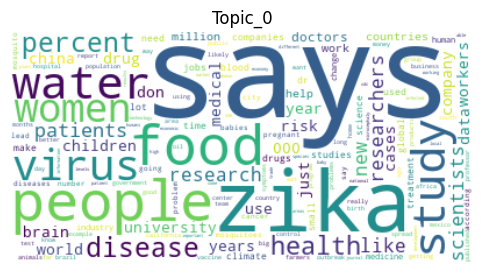

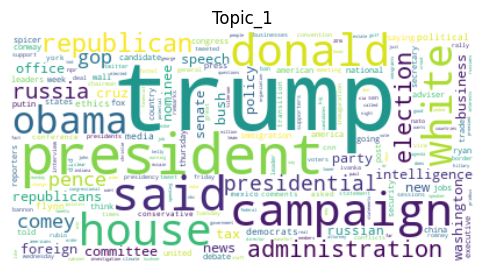

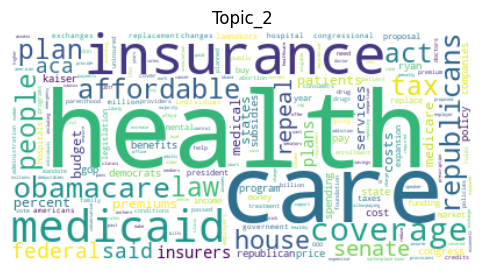

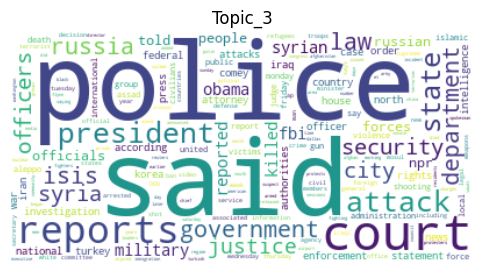

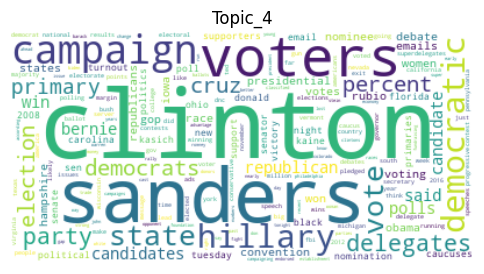

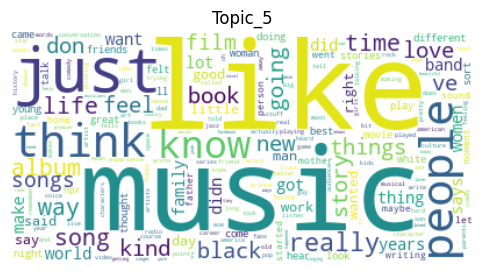

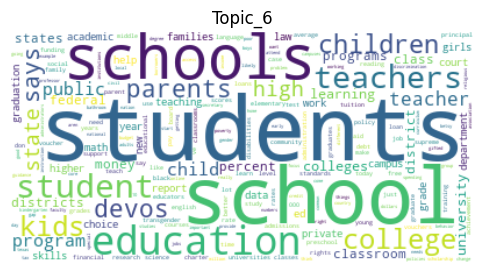

In [368]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f"Topic_{n}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

In [369]:
n = 0
for topic in nmf_model.components_:
    print(n)
    print(keys[topic.argsort()][-15:])
    print('\n')
    n+=1

0
['new' 'research' 'like' 'patients' 'health' 'disease' 'percent' 'women'
 'virus' 'study' 'water' 'food' 'people' 'zika' 'says']


1
['gop' 'pence' 'presidential' 'russia' 'administration' 'election'
 'republican' 'obama' 'white' 'house' 'donald' 'campaign' 'said'
 'president' 'trump']


2
['senate' 'house' 'people' 'act' 'law' 'tax' 'plan' 'republicans'
 'affordable' 'obamacare' 'coverage' 'medicaid' 'insurance' 'care'
 'health']


3
['officers' 'syria' 'security' 'department' 'law' 'isis' 'russia'
 'government' 'state' 'attack' 'president' 'reports' 'court' 'said'
 'police']


4
['primary' 'cruz' 'election' 'democrats' 'percent' 'party' 'delegates'
 'vote' 'state' 'democratic' 'hillary' 'campaign' 'voters' 'sanders'
 'clinton']


5
['love' 've' 'don' 'album' 'way' 'time' 'song' 'life' 'really' 'know'
 'people' 'think' 'just' 'music' 'like']


6
['teacher' 'state' 'high' 'says' 'parents' 'devos' 'children' 'college'
 'kids' 'teachers' 'student' 'education' 'schools' 'school' 'studen

In [384]:
topics = {0: 'Medical Research'
          , 1: 'Presidential Election'
          , 2: 'Finance'
          , 3: 'International News'
          , 4: 'National News'
          , 5: 'Cultural'
          , 6: 'Education'
         }

In [381]:
data['topic_raw'] = nmf_model.transform(dtm).argmax(axis=1)

violation: 1.0
violation: 0.3782356590667799
violation: 0.04828263602731958
violation: 0.006546528403533485
violation: 0.0018206224678587984
violation: 0.0003989653844738538
violation: 6.938078415141984e-05
Converged at iteration 8


In [386]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data.head()

Article  topic_raw  \
0  In the Washington of 2016, even when the polic...          1   
1    Donald Trump has used Twitter  —   his prefe...          1   
2    Donald Trump is unabashedly praising Russian...          1   
3  Updated at 2:50 p. m. ET, Russian President Vl...          3   
4  From photography, illustration and video, to d...          6   

                   topic  
0  Presidential Election  
1  Presidential Election  
2  Presidential Election  
3     International News  
4              Education

In [387]:
sample =  data.sample(2)
for topic, text in zip(sample.topic, sample.Article):
    print(topic)
    print(text[:350], end='\n\n')

Education
To be human is to be constantly at war between our lofty goals and our immediate impulses. Future Me wants me to run 5 miles. Right Now Me wants a cookie. Unfortunately, that totally understandable tendency is one factor that can stop people from completing their education: An unusual organization wants to change all that  —   not by the typical me

International News
The   company Theranos  —   until recently a Silicon Valley darling  —   lost its largest revenue source after Walgreens terminated the companies’ relationship late Sunday. Walgreens cited problems federal regulators have had with Theranos’ lab testing and potential sanctions over problems found at its labs. Walgreens’ withdrawal is another step in



# Quora

In [412]:
data = pd.read_csv('quora_questions.csv')
data.head()

Question
0  What is the step by step guide to invest in sh...
1  What is the story of Kohinoor (Koh-i-Noor) Dia...
2  How can I increase the speed of my internet co...
3  Why am I mentally very lonely? How can I solve...
4  Which one dissolve in water quikly sugar, salt...

In [413]:
cv = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
dtm = cv.fit_transform(data.Question)

Of course there is no topic to the artical or category for that matter thus we would need to set it ourselves 

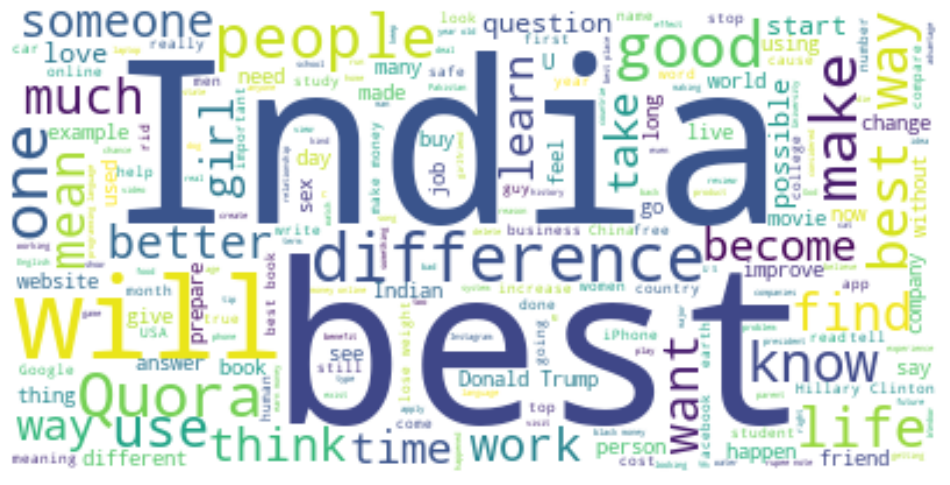

In [414]:
# Get all the text
text =  data.Question.to_list()
text = ' '.join(text)
wordcloud = WordCloud(background_color='white').generate(text)

# Plot Word Cloud
plt.figure(figsize=(12,8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Preprocessing

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

## Fitting the Data

### LDA

In [415]:
LDA = LatentDirichletAllocation(n_components=7
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=10).fit(dtm)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [416]:
print(len(cv.get_feature_names_out()), LDA.components_[0].shape)
keys = cv.get_feature_names_out()

38669 (38669,)


In [417]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

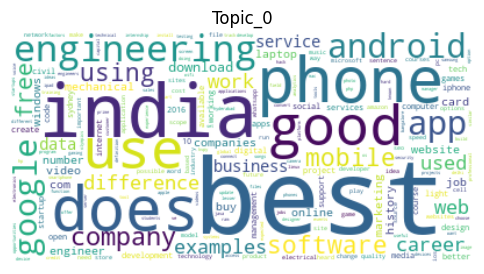

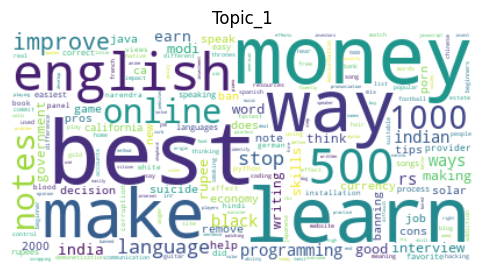

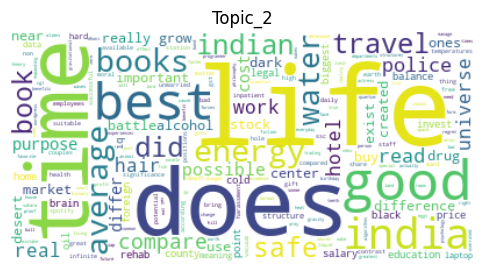

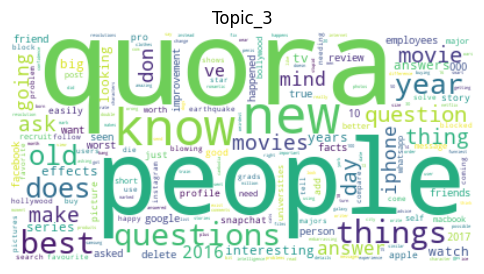

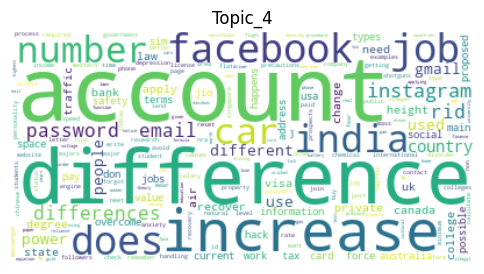

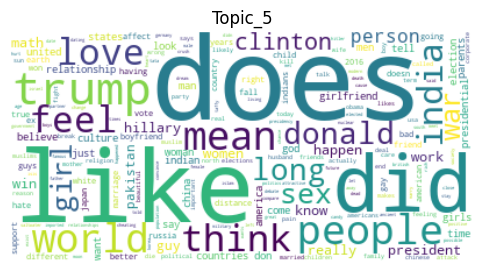

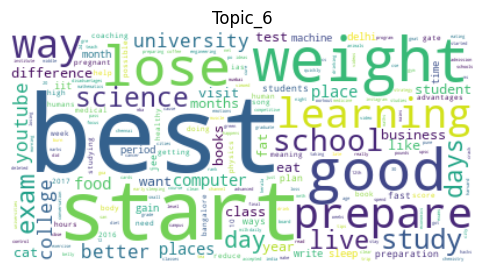

In [418]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f"Topic_{n}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

In [419]:
n = 0
for topic in LDA.components_:
    print(n)
    print(keys[topic.argsort()][-15:])
    print('\n')
    n+=1

0
['free' 'using' 'mobile' 'software' 'company' 'google' 'app' 'android'
 'engineering' 'use' 'good' 'does' 'phone' 'india' 'best']


1
['ways' 'programming' 'stop' 'language' 'improve' '1000' 'notes' 'online'
 '500' 'english' 'make' 'way' 'learn' 'money' 'best']


2
['safe' 'book' 'indian' 'did' 'travel' 'water' 'average' 'books' 'energy'
 'india' 'best' 'good' 'time' 'does' 'life']


3
['make' 'thing' 'movies' 'movie' 'question' 'does' 'old' 'year' 'things'
 'best' 'questions' 'know' 'new' 'people' 'quora']


4
['country' 'email' 'differences' 'rid' 'password' 'instagram' 'number'
 'car' 'india' 'job' 'does' 'facebook' 'increase' 'difference' 'account']


5
['sex' 'girl' 'long' 'donald' 'india' 'feel' 'love' 'think' 'world' 'mean'
 'people' 'trump' 'did' 'like' 'does']


6
['day' 'days' 'exam' 'live' 'science' 'study' 'school' 'way' 'learning'
 'prepare' 'lose' 'good' 'weight' 'start' 'best']




In [407]:
topics = {0: 'Mobile Engineering'
          , 1: 'Programing'
          , 2: 'Indian Books'
          , 3: 'Movies'
          , 4: 'Social Media'
          , 5: 'People'
          , 6
         }

In [408]:
data['topic_raw'] = LDA.transform(dtm).argmax(axis=1)

In [409]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data.head()

Unnamed: 0      topic                                               text  \
0           0   Training   problem searching patterns data fundamental o...   
1           1   Training   begin introducing simple regression problem s...   
2           2  Variables   key concept ﬁeld pattern recognition uncertai...   
3           3  Variables   well considering probabilities deﬁned discret...   
4           4       Data   one important operations involving probabilit...   

   topic_raw  
0          2  
1          2  
2          3  
3          3  
4          0

In [411]:
sample =  data.sample(2)
for topic, text in zip(sample.topic, sample.text):
    print(topic)
    print(text[:450], end='\n\n')

Data
 consider alternative way restrict family distri butions suppose partition elements disjoint groups denote assume distribution factorizes respect groups variational inference emphasized making assumptions distri bution particular place restriction functional forms individual factors factorized form variational inference corresponds proximation framework developed physics called mean ﬁeld theory parisi amongst distributions form seek distri bution

Data
 also straightforwardly evaluate lower bound model practice useful able monitor bound estimation order test convergence also provide valuable check math ematical expressions solutions software implementation step iterative estimation procedure value bound decrease take stage provide deeper test correctness mathematical derivation update equations software plementation using ﬁnite differences check update indeed give constrained maximum bound sven



### NMF

In [330]:
tfidf = TfidfVectorizer(stop_words=stop_words)
dtm = tfidf.fit_transform(data.sotu)

C:\Users\alexandru.parvu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['agriculture', 'although', 'avoid', 'british', 'catholic', 'congress', 'constitution', 'europe', 'fisheries', 'french', 'gentlemen', 'government', 'great', 'his', 'house', 'however', 'indian', 'interruption', 'london', 'majesty', 'philadelphia', 'representatives', 'republic', 'safety', 'senate', 'session', 'several', 'spain', 'spanish', 'states', 'united'] not in stop_words.
  warnings.warn(


In [332]:
nmf_model = NMF(n_components=3,random_state=42, verbose=1, max_iter=1000)
nmf_model.fit(dtm)

violation: 1.0
violation: 0.49634777868629054
violation: 0.592886345053148
violation: 0.9077132733714909
violation: 1.0164349959116925
violation: 0.48841646225129465
violation: 1.133251567184519
violation: 0.7230307985827201
violation: 0.5270373398746252
violation: 1.2124011992368493
violation: 1.0650313436903789
violation: 1.4921231943308804
violation: 0.3535840828563641
violation: 0.10294358135731807
violation: 0.47571545380212593
violation: 0.5185064050149905
violation: 0.06413191605342056
violation: 0.0
Converged at iteration 19


C:\Users\alexandru.parvu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(max_iter=1000, n_components=3, random_state=42, verbose=1)

In [333]:
print(tfidf.get_feature_names_out().shape, nmf_model.components_[0].shape)
keys = tfidf.get_feature_names_out()

(495,) (495,)


In [340]:
topics = []
for topic in nmf_model.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

C:\Users\alexandru.parvu\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:417: RuntimeWarning: invalid value encountered in double_scalars
  frequencies = [(word, freq / max_frequency)


ValueError: cannot convert float NaN to integer

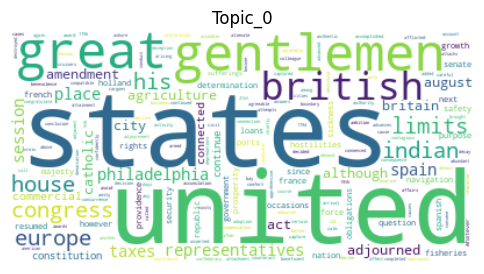

In [335]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f"Topic_{n}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

In [329]:
n = 0
for topic in nmf_model.components_:
    print(n)
    print(keys[topic.argsort()][-15:])
    print('\n')
    n+=1

0
['subjects' 'time' 'sums' 'met' 'sea' 'vessels' 'defense' 'measures'
 'article' 'commerce' 'citizens' 'commissioners' 'treaty' 'states'
 'united']


1
['event' 'examination' 'examine' 'excite' 'excited' 'expenses' 'execution'
 'exertion' 'exertions' 'exist' 'existence' 'expect' 'expectation'
 'exerted' 'zealous']


2
['event' 'examination' 'examine' 'excite' 'excited' 'expenses' 'execution'
 'exertion' 'exertions' 'exist' 'existence' 'expect' 'expectation'
 'exerted' 'zealous']


3
['event' 'examination' 'examine' 'excite' 'excited' 'expenses' 'execution'
 'exertion' 'exertions' 'exist' 'existence' 'expect' 'expectation'
 'exerted' 'zealous']


4
['event' 'examination' 'examine' 'excite' 'excited' 'expenses' 'execution'
 'exertion' 'exertions' 'exist' 'existence' 'expect' 'expectation'
 'exerted' 'zealous']


5
['event' 'examination' 'examine' 'excite' 'excited' 'expenses' 'execution'
 'exertion' 'exertions' 'exist' 'existence' 'expect' 'expectation'
 'exerted' 'zealous']


6
['event

In [192]:
topics = {0: 'Medical Research'
          , 1: 'Presidential Election'
          , 2: 'Finance'
          , 3: 'International News'
          , 4: 'National News'
          , 5: 'Cultural'
          , 6: 'Education'
         }

In [193]:
data['topic_raw'] = nmf_model.transform(dtm).argmax(axis=1)

violation: 1.0
violation: 0.3782356590667799
violation: 0.04828263602731958
violation: 0.006546528403533485
violation: 0.0018206224678587984
violation: 0.0003989653844738538
violation: 6.938078415141984e-05
Converged at iteration 8


In [194]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data.head()

Article  topic_raw  \
0  In the Washington of 2016, even when the polic...          1   
1    Donald Trump has used Twitter  —   his prefe...          1   
2    Donald Trump is unabashedly praising Russian...          1   
3  Updated at 2:50 p. m. ET, Russian President Vl...          3   
4  From photography, illustration and video, to d...          6   

                   topic  
0  Presidential Election  
1  Presidential Election  
2  Presidential Election  
3     International News  
4              Education

In [198]:
sample =  data.sample(2)
for topic, text in zip(sample.topic, sample.Article):
    print(topic)
    print(text[:350], end='\n\n')

Medical Research
On a cold windy morning, Kelly Nissen feeds the cows at the Iowa State University Beef Nutrition Farm. He weighs out specific rations and carefully delivers them to numbered feed bunks. ”When you’re feeding, you’re always   yourself to make sure it’s going in the right lot,” Nissen says. It’s important  —   because these cows munch on more than jus

International News
An online controversy over a South Korean voice actress’s tweeted image of a   has escalated into what is now being called East Asia’s version of Gamergate  —   a reference to the vitriolic controversy that pitted gamers, largely men, against women in tech. Twelve hours after posting a photo of a shirt reading ”Girls Do Not Need A Prince,” Kim Jaye



# End